In [68]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import time
from mpl_toolkits.mplot3d import Axes3D

In [69]:
# importation du jeu de donées des profils 
df = pd.read_csv("labels.csv")
df.head(5)

,Unnamed: 0,nombre_tweet,hstag,Nombreurl,agressivite,frenquenTweet,frequenceAmi,frequenceFavourite,frequenceMention,frequenceFollowers,longMoyen,hstagmoyenTweet,refermoyenTweet,visibilite,labels
0,0,6,6.0,5.0,0.165714,2.816108e-07,1.536059e-08,1.945675e-07,1.024039e-08,7.168275e-08,113.333333,1.0,0.666667,0.408571,0
1,1,1,0.0,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,139.000000,0.0,1.000000,0.081429,0
2,2,1,0.0,1.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,31.000000,0.0,0.000000,0.000000,1
3,3,1,1.0,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,88.000000,1.0,0.000000,0.082857,1
4,4,1,3.0,1.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,140.000000,3.0,1.000000,0.330000,0


Effectuons une première ACP en gardant tous les composants

In [70]:
from sklearn.preprocessing import StandardScaler

# Normaliser les
X = df.iloc[:,1:14]
X_cr = StandardScaler().fit_transform(X)
pca = PCA()
pca.fit(X_cr)
X.head(5)

,nombre_tweet,hstag,Nombreurl,agressivite,frenquenTweet,frequenceAmi,frequenceFavourite,frequenceMention,frequenceFollowers,longMoyen,hstagmoyenTweet,refermoyenTweet,visibilite
0,6,6.0,5.0,0.165714,2.816108e-07,1.536059e-08,1.945675e-07,1.024039e-08,7.168275e-08,113.333333,1.0,0.666667,0.408571
1,1,0.0,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,139.000000,0.0,1.000000,0.081429
2,1,0.0,1.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,31.000000,0.0,0.000000,0.000000
3,1,1.0,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,88.000000,1.0,0.000000,0.082857
4,1,3.0,1.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,140.000000,3.0,1.000000,0.330000


Affichage et représentation des valeurs propres de cette première ACP afin de déterminer les composants à retenir

Variances expliquées:
[3.72676929 1.72647586 1.52057905 1.17074232 1.02458173 0.94741203
 0.94309474 0.59234974 0.54982613 0.31041077 0.22316851 0.19160459
 0.07299229]


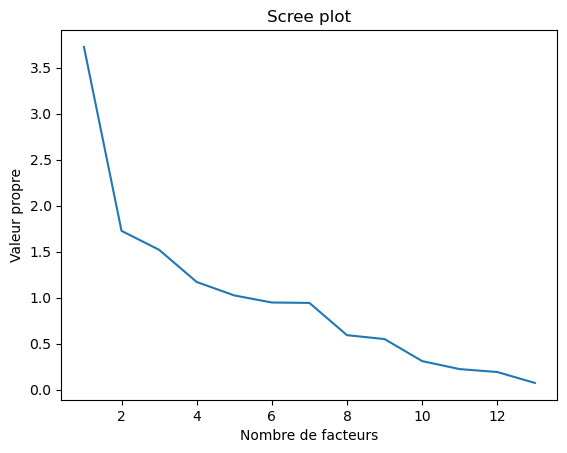

In [71]:
print("Variances expliquées:")
print(pca.explained_variance_)

# ajustement de variance pour avoir la variance avec le degré de liberté ayant la même valeur que le nombre de variables
eigenvalues = pca.explained_variance_*(len(X_cr)-1)/len(X_cr)
n = pca.n_components_
plt.plot(np.arange(1,n+1),eigenvalues)
plt.title("Scree plot")
plt.ylabel("Valeur propre")
plt.xlabel("Nombre de facteurs")
plt.show()

## Ratio de variance expliquee

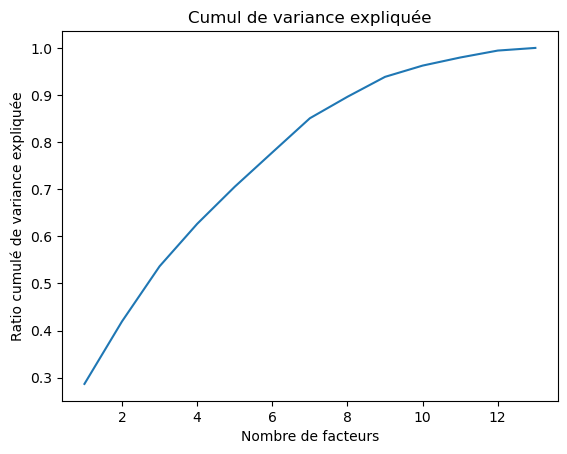

In [72]:
plt.plot(np.arange(1,n+1),np.cumsum(pca.explained_variance_ratio_))
plt.title("Cumul de variance expliquée")
plt.ylabel("Ratio cumulé de variance expliquée")
plt.xlabel("Nombre de facteurs")
plt.show()

## Representation des variables

In [73]:
# Nous avons besoin des vecteurs propres pour l’analyse des variables.
# on récupère le champ components_ de l'objet ACP 
# Attention acp.components retourne la matrice des vecteurs propres facteurs x variables
# il faut la transposer pour avoir la matrice des vecteurs propres variables x facteurs  
vp_mat=pca.components_.T
vp_mat

array([[ 4.76916580e-01, -1.84244447e-01,  1.30941171e-01,
         4.38432927e-02, -1.19399638e-02,  8.91443334e-02,
        -4.94218536e-02, -6.25069216e-02,  4.23380379e-02,
         2.30762890e-02,  6.38262973e-02, -2.39312424e-02,
        -8.35539526e-01],
       [ 4.46740974e-01, -2.26350118e-01,  7.21840746e-02,
         7.76883006e-02, -1.12465365e-02, -5.24448250e-02,
         1.34619437e-02, -4.00178433e-02,  8.41027204e-02,
        -2.18081001e-01,  7.29173716e-01, -8.64440689e-02,
         3.73474284e-01],
       [ 4.32260660e-01, -1.98897748e-01,  1.55814982e-01,
         7.47022872e-02,  1.37806452e-02,  1.01265495e-01,
        -7.41383234e-02, -1.22807534e-01,  7.53550343e-02,
        -4.69163023e-01, -6.33562554e-01,  7.16428285e-02,
         2.83517814e-01],
       [ 2.76490304e-01,  5.42907252e-01, -3.24691286e-02,
         2.16094788e-01, -1.08154863e-01,  6.72107630e-02,
         1.17147570e-01, -5.60282869e-03, -2.03518275e-01,
         5.44617802e-02, -8.98629080e

In [74]:
# On calcule la racine carrée des valeurs propres
sqrt_eigval = np.sqrt(eigenvalues)

In [75]:
# Corrélation des variables avec les axes
corvar = np.zeros((13,13))
for k in range(13):
     corvar[:,k] = vp_mat[:,k] * sqrt_eigval[k]

# Afficher la matrice des corrélations variables x facteurs
print(corvar)

[[ 9.20679679e-01 -2.42088714e-01  1.61465821e-01  4.74388010e-02
  -1.20858221e-02  8.67686961e-02 -4.79950638e-02 -4.81079771e-02
   3.13937573e-02  1.28568401e-02  3.01519907e-02 -1.04753389e-02
  -2.25738373e-01]
 [ 8.62426163e-01 -2.97413627e-01  8.90114296e-02  8.40593760e-02
  -1.13839239e-02 -5.10472053e-02  1.30733025e-02 -3.07994289e-02
   6.23623701e-02 -1.21502749e-01  3.44466780e-01 -3.78388594e-02
   1.00901842e-01]
 [ 8.34472154e-01 -2.61342477e-01  1.92138146e-01  8.08284851e-02
   1.39489892e-02  9.85668370e-02 -7.19979787e-02 -9.45178847e-02
   5.58759398e-02 -2.61391854e-01 -2.99299396e-01  3.13599643e-02
   7.65982313e-02]
 [ 5.33760021e-01  7.13355116e-01 -4.00382435e-02  2.33816326e-01
  -1.09476080e-01  6.54196408e-02  1.13765565e-01 -4.31217451e-03
  -1.50909292e-01  3.03431111e-02 -4.24518683e-02 -3.08283772e-01
   1.37941613e-02]
 [ 5.07856040e-01  4.54852707e-01 -4.13783866e-02 -5.28863445e-01
  -2.23921722e-02 -1.16404308e-03  7.24059324e-02 -2.44999008e-02


In [76]:
# On affiche les corrélations pour les deux premiers axes
print(pd.DataFrame({'id':X.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1],'COR_3':corvar[:,2]}))

                    id     COR_1     COR_2     COR_3
0         nombre_tweet  0.920680 -0.242089  0.161466
1                hstag  0.862426 -0.297414  0.089011
2            Nombreurl  0.834472 -0.261342  0.192138
3          agressivite  0.533760  0.713355 -0.040038
4        frenquenTweet  0.507856  0.454853 -0.041378
5         frequenceAmi  0.213993  0.704229 -0.044006
6   frequenceFavourite  0.314000  0.413126 -0.043186
7     frequenceMention  0.040854  0.006456  0.022708
8   frequenceFollowers  0.139065  0.209739  0.015947
9            longMoyen  0.087792 -0.080102 -0.804694
10     hstagmoyenTweet  0.171192 -0.159284 -0.463325
11     refermoyenTweet  0.062011 -0.047942 -0.745705
12          visibilite  0.830614 -0.224981 -0.153302


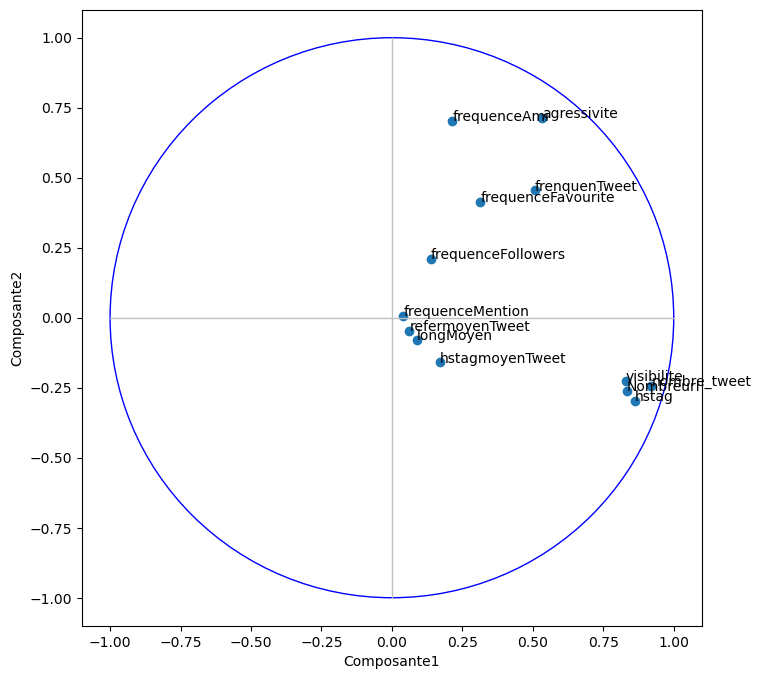

In [44]:
# Cercle des corrélations pour les deux premiers axes
fig, axes = plt.subplots(figsize=(8,8))

# les points
plt.scatter(corvar[:,0],corvar[:,1])

# affichage des étiquettes (noms des variables)
for j in range(13):
     plt.annotate(X.columns[j],(corvar[j,0],corvar[j,1]))

# ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

# ajouter le cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
axes.set_xlabel('Composante1')
axes.set_ylabel('Composante2')
#affichage
plt.show()

### composante 1 et 3

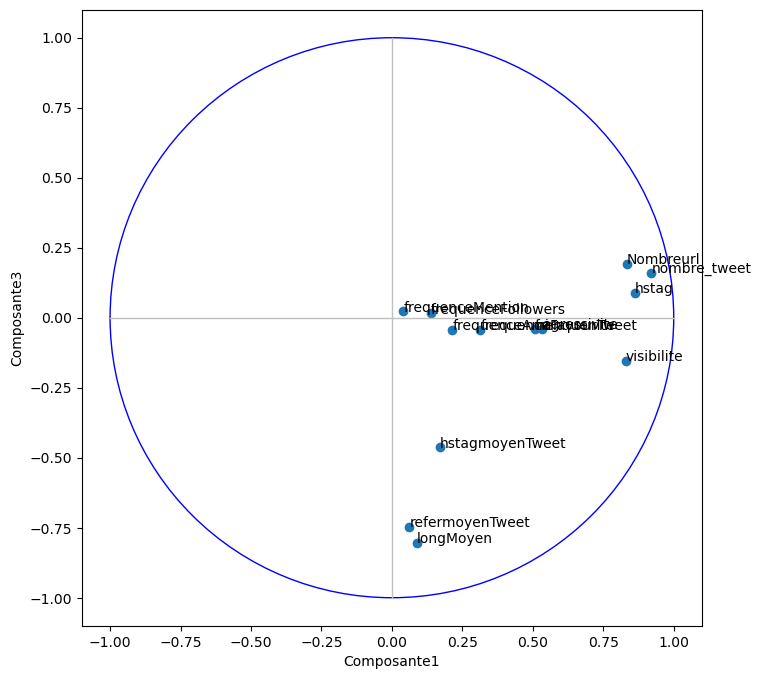

In [45]:
# Cercle des corrélations pour les deux premiers axes
fig, axes = plt.subplots(figsize=(8,8))

# les points
plt.scatter(corvar[:,0],corvar[:,2])

# affichage des étiquettes (noms des variables)
for j in range(13):
     plt.annotate(X.columns[j],(corvar[j,0],corvar[j,2]))

# ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

# ajouter le cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
axes.set_xlabel('Composante1')
axes.set_ylabel('Composante3')

#affichage
plt.show()

### composante 2 et 3

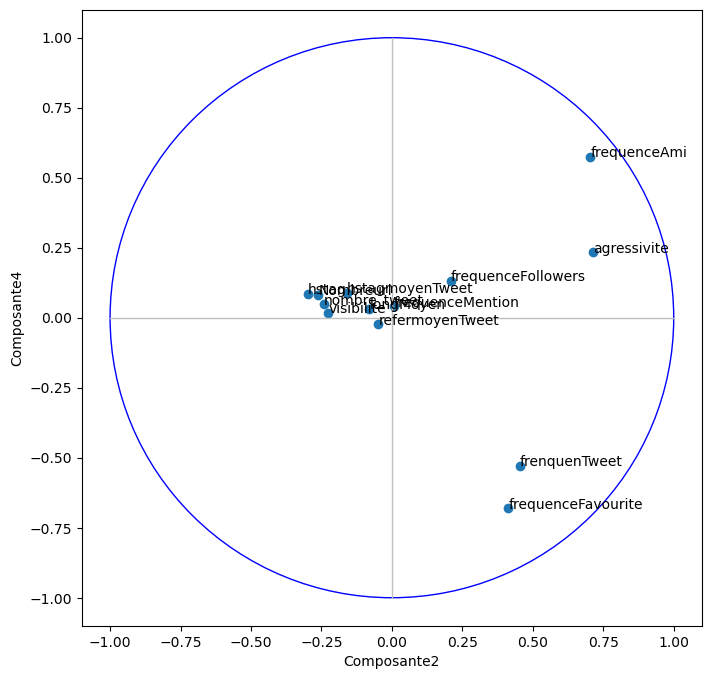

In [49]:
# Cercle des corrélations pour les deux premiers axes
fig, axes = plt.subplots(figsize=(8,8))

# les points
plt.scatter(corvar[:,1],corvar[:,3])

# affichage des étiquettes (noms des variables)
for j in range(13):
     plt.annotate(X.columns[j],(corvar[j,1],corvar[j,3]))

# ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

# ajouter le cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
axes.set_xlabel('Composante2')
axes.set_ylabel('Composante4')

#affichage
plt.show()

## Representation avec l'ACP

Dans le but d'une representation en 3 dimension nous allons garder 3 dimensions

In [19]:
pca = PCA()
coord = pca.fit_transform(X_cr)

In [23]:
data = pd.DataFrame(coord, columns=["Composant1", "Composant2","Composant3","Composant4","Composant5",
                                    "Composant6","Composant7","Composant8","Composant9","Composant10",
                                    "Composant11","Composant12","Composant13"])
data['label'] = df['labels']
data.shape

(1843416, 14)

### Representation graphique du Kmeans

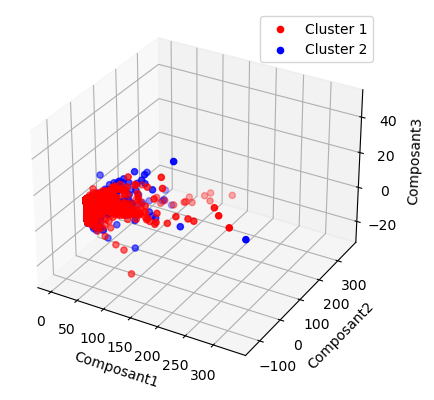

42.10404181480408


In [39]:
start = time.time()

data['label'] = data['label']


# Séparer les données par cluster
cluster1 = data[data['label'] == 0]
cluster2 = data[data['label'] == 1]

# Créer la figure et les sous-graphiques 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Tracer les points du premier cluster en rouge
ax.scatter(cluster1['Composant1'], cluster1['Composant2'], cluster1['Composant3'], c='red', label='Cluster 1')

# Tracer les points du deuxième cluster en bleu
ax.scatter(cluster2['Composant1'], cluster2['Composant2'], cluster2['Composant3'], c='blue', label='Cluster 2')

# Étiquettes des axes
ax.set_xlabel('Composant1')
ax.set_ylabel('Composant2')
ax.set_zlabel('Composant3')

# Légende
ax.legend()

# Afficher le graphique interactif
plt.show()
print(time.time()-start)

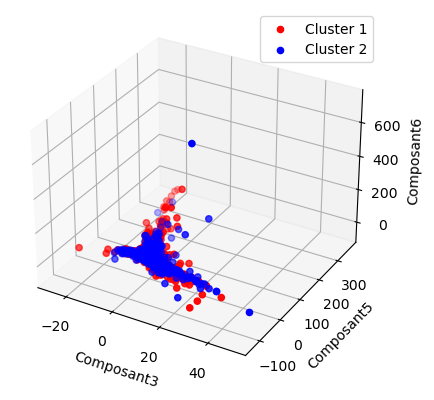

44.094165086746216


In [61]:
start = time.time()

data['label'] = data['label']


# Séparer les données par cluster
cluster1 = data[data['label'] == 0]
cluster2 = data[data['label'] == 1]

# Créer la figure et les sous-graphiques 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Tracer les points du premier cluster en rouge
ax.scatter(cluster1['Composant3'], cluster1['Composant2'], cluster1['Composant5'], c='red', label='Cluster 1')

# Tracer les points du deuxième cluster en bleu
ax.scatter(cluster2['Composant3'], cluster2['Composant2'], cluster2['Composant5'], c='blue', label='Cluster 2')

# Étiquettes des axes
ax.set_xlabel('Composant3')
ax.set_ylabel('Composant5')
ax.set_zlabel('Composant6')

# Légende
ax.legend()

# Afficher le graphique interactif
plt.show()
print(time.time()-start)

## Representation en 2 dimensions ( composante 1 et 2)

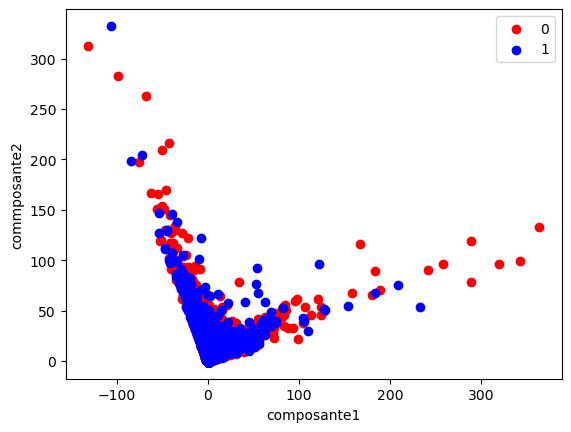

13.351342678070068


In [60]:
start = time.time()

data['label'] = data['label']

# Définir les couleurs pour chaque label
couleurs = {0: 'red', 1: 'blue'}

# Créer un scatter plot avec une couleur différente pour chaque label
for label, color in couleurs.items():
    df_label = data[data['label'] == label]
    plt.scatter(df_label['Composant2'], df_label['Composant1'], color=color, label=str(label))

# Ajouter une légende
plt.legend()
plt.xlabel('composante1')
plt.ylabel('commposante2')
# Afficher le graphique
plt.show()


print(time.time()-start)

### Representation  Composante 1 et 3

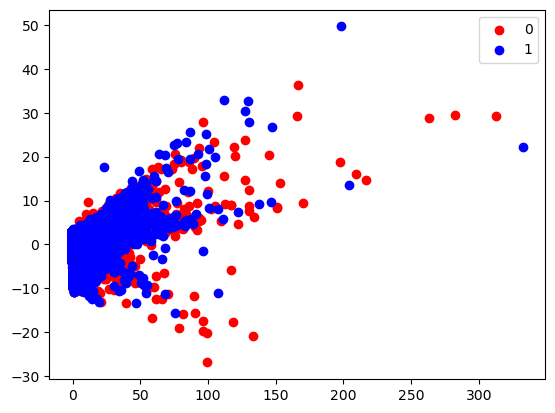

14.02810001373291


In [29]:
start = time.time()

data['label'] = data['label']

# Définir les couleurs pour chaque label
couleurs = {0: 'red', 1: 'blue'}

# Créer un scatter plot avec une couleur différente pour chaque label
for label, color in couleurs.items():
    df_label = data[data['label'] == label]
    plt.scatter(df_label['Composant1'], df_label['Composant3'], color=color, label=str(label))

# Ajouter une légende
plt.legend()

# Afficher le graphique
plt.show()


print(time.time()-start)

### composante 2 et 3

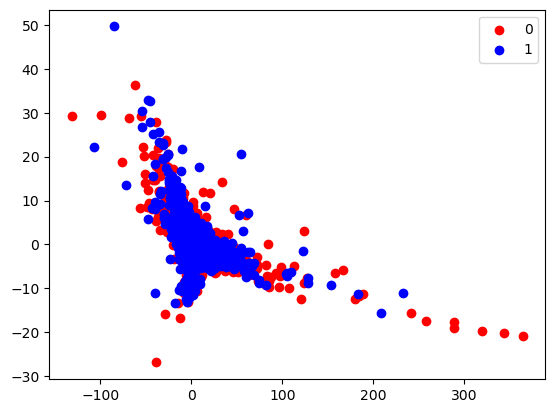

13.71559476852417


In [30]:
start = time.time()

data['label'] = data['label']

# Définir les couleurs pour chaque label
couleurs = {0: 'red', 1: 'blue'}

# Créer un scatter plot avec une couleur différente pour chaque label
for label, color in couleurs.items():
    df_label = data[data['label'] == label]
    plt.scatter(df_label['Composant2'], df_label['Composant3'], color=color, label=str(label))

# Ajouter une légende
plt.legend()

# Afficher le graphique
plt.show()


print(time.time()-start)

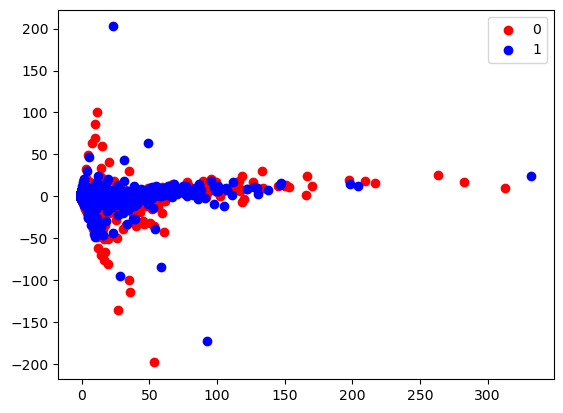

13.765317916870117


In [59]:
start = time.time()

data['label'] = data['label']

# Définir les couleurs pour chaque label
couleurs = {0: 'red', 1: 'blue'}

# Créer un scatter plot avec une couleur différente pour chaque label
for label, color in couleurs.items():
    df_label = data[data['label'] == label]
    plt.scatter(df_label['Composant1'], df_label['Composant6'], color=color, label=str(label))

# Ajouter une légende
plt.legend()

# Afficher le graphique
plt.show()


print(time.time()-start)

### Representation graphique SVM

In [77]:
df = pd.read_csv('svm.csv')

In [78]:
data = pd.DataFrame(coord, columns=["Composant1", "Composant2","Composant3","Composant4","Composant5",
                                    "Composant6","Composant7","Composant8","Composant9","Composant10",
                                    "Composant11","Composant12","Composant13"])
data['label'] = df['label']
data.shape

(1843416, 14)

In [79]:
data[data['label']==0]

,Composant1,Composant2,Composant3,Composant4,Composant5,Composant6,Composant7,Composant8,Composant9,Composant10,Composant11,Composant12,Composant13,label
0,0.855925,0.055155,0.419644,-0.140139,0.127810,0.237393,-0.130213,-0.488299,-0.070749,-0.096847,-0.382582,0.054013,-0.049579,0
1,-0.667016,0.076275,-0.322447,0.006722,0.051532,0.880197,-0.469195,-0.903615,0.054986,0.167109,0.173606,0.007651,0.017167,0
2,-0.831635,0.315150,2.800407,-0.044425,-0.092104,0.060757,0.009610,0.767824,-0.021193,0.058514,0.002768,0.018997,0.098273,0
3,-0.697447,0.129519,1.329397,0.052089,-0.038498,-0.358721,0.186829,-0.350683,-0.024430,0.269915,0.085132,0.017948,0.030004,0
4,-0.134813,-0.326169,-1.111482,0.209629,0.023623,-0.637953,0.288299,-0.391924,0.023343,-0.037494,-0.127619,0.018391,0.021448,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1843411,-0.321003,-0.158636,0.189179,0.135761,-0.056054,-0.792486,0.415085,1.153696,-0.026142,-0.102329,0.008281,-0.015374,-0.053239,0
1843412,-0.321003,-0.158636,0.189179,0.135761,-0.056054,-0.792486,0.415085,1.153696,-0.026142,-0.102329,0.008281,-0.015374,-0.053239,0
1843413,-0.079303,-0.406330,-1.453503,0.257268,0.012324,-1.169714,0.559271,-0.225005,-0.008017,0.033446,-0.045858,0.001843,-0.058289,0
1843414,-0.321003,-0.158636,0.189179,0.135761,-0.056054,-0.792486,0.415085,1.153696,-0.026142,-0.102329,0.008281,-0.015374,-0.053239,0


In [80]:
data[data['label']==1]

,Composant1,Composant2,Composant3,Composant4,Composant5,Composant6,Composant7,Composant8,Composant9,Composant10,Composant11,Composant12,Composant13,label
171,0.206697,0.142645,2.216625,1.020857,20.915063,5.580059,13.373130,0.541038,0.218908,0.322173,0.050059,0.105663,0.054951,1
635,2.812829,0.781377,1.650979,-1.453220,-0.037638,-0.357755,0.128976,-0.324966,1.193412,-0.481310,0.039568,-0.460000,-0.873152,1
954,1.734677,2.982159,0.824267,-4.975500,0.050031,-1.045066,0.631228,0.590507,-0.419632,-0.661045,0.271983,1.639766,0.022920,1
1124,12.267148,-4.876147,2.752312,1.433165,-0.367261,-1.683475,0.693688,-1.108414,1.435170,-3.951197,8.474284,-1.296390,-0.225795,1
1177,2.145720,3.492257,-0.248429,-1.346907,-0.459113,0.610491,0.518847,-0.358376,-3.557518,-0.590517,-0.232452,-0.628448,0.298274,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1841850,2.435048,2.995245,0.593797,-4.956277,0.024284,0.192061,0.065764,0.481121,-0.503065,-0.440351,0.035849,1.573238,-0.152391,1
1842545,0.744993,-0.125116,-5.848014,-0.243000,0.078046,4.364268,-2.119051,4.325204,0.212161,-0.821944,0.276114,0.380133,-0.130138,1
1843158,2.313194,3.232182,-1.211724,-5.590285,0.137952,-0.651927,0.419865,-0.691978,-0.444693,-0.452184,0.516685,1.798246,-0.059746,1
1843342,0.193454,-0.535691,-5.810737,-0.086611,0.159954,4.114820,-2.092653,4.190844,0.278836,-1.577125,0.180370,-0.136278,-0.195461,1


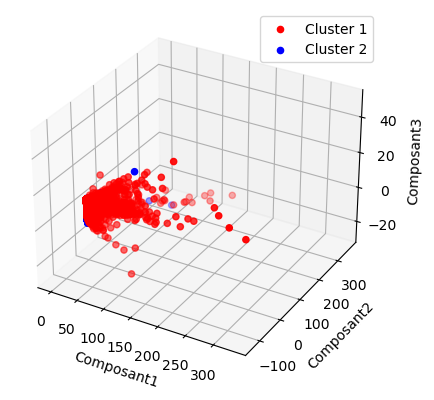

127.70017313957214


In [81]:
start = time.time()

data['label'] = data['label']


# Séparer les données par cluster
cluster1 = data[data['label'] == 0]
cluster2 = data[data['label'] == 1]

# Créer la figure et les sous-graphiques 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Tracer les points du premier cluster en rouge
ax.scatter(cluster1['Composant1'], cluster1['Composant2'], cluster1['Composant3'], c='red', label='Cluster 1')

# Tracer les points du deuxième cluster en bleu
ax.scatter(cluster2['Composant1'], cluster2['Composant2'], cluster2['Composant3'], c='blue', label='Cluster 2')

# Étiquettes des axes
ax.set_xlabel('Composant1')
ax.set_ylabel('Composant2')
ax.set_zlabel('Composant3')

# Légende
ax.legend()

# Afficher le graphique interactif
plt.show()
print(time.time()-start)

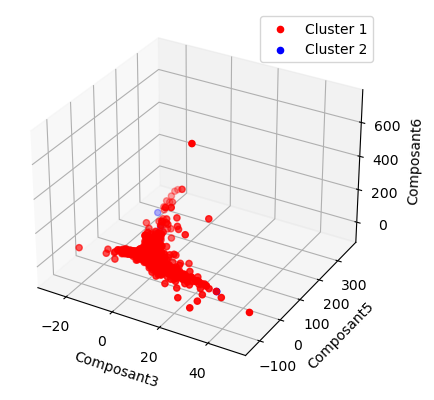

126.53140044212341


In [82]:
start = time.time()

data['label'] = data['label']


# Séparer les données par cluster
cluster1 = data[data['label'] == 0]
cluster2 = data[data['label'] == 1]

# Créer la figure et les sous-graphiques 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Tracer les points du premier cluster en rouge
ax.scatter(cluster1['Composant3'], cluster1['Composant2'], cluster1['Composant5'], c='red', label='Cluster 1')

# Tracer les points du deuxième cluster en bleu
ax.scatter(cluster2['Composant3'], cluster2['Composant2'], cluster2['Composant5'], c='blue', label='Cluster 2')

# Étiquettes des axes
ax.set_xlabel('Composant3')
ax.set_ylabel('Composant5')
ax.set_zlabel('Composant6')

# Légende
ax.legend()

# Afficher le graphique interactif
plt.show()
print(time.time()-start)

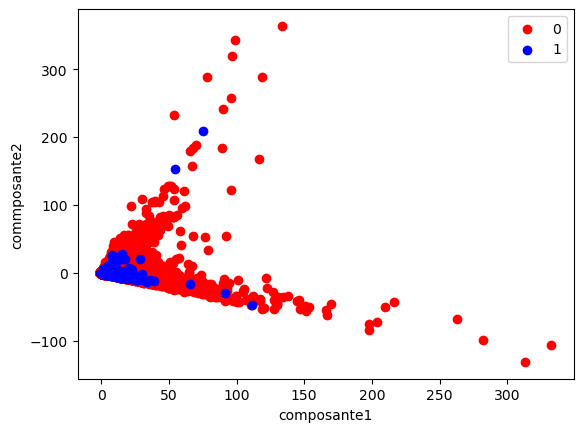

38.99374961853027


In [83]:
start = time.time()

data['label'] = data['label']

# Définir les couleurs pour chaque label
couleurs = {0: 'red', 1: 'blue'}

# Créer un scatter plot avec une couleur différente pour chaque label
for label, color in couleurs.items():
    df_label = data[data['label'] == label]
    plt.scatter(df_label['Composant1'], df_label['Composant2'], color=color, label=str(label))

# Ajouter une légende
plt.legend()
plt.xlabel('composante1')
plt.ylabel('commposante2')
# Afficher le graphique
plt.show()


print(time.time()-start)